# Features Engineering - Trend

Identifying **trends** is at the heart of most quantitative trading strategies. Trend-related features help traders and quants capture the market's directional bias, momentum strength, and phase transitions. In this notebook, we will dive into key **trend-based features** extracted with the `quantreo` package.

**Tips: Trend indicators are more effective when combined with volatility or regime filters to reduce false signals and improve model robustness. You can also enhance trend signals by smoothing them (e.g., using an EMA or KAMA on the raw trend output).**


In [1]:
# Import the Features Engineering Package from Quantreo
import quantreo.features_engineering as fe

# To display the graphics
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
# Import a dataset to test the functions and create new ones easily
from quantreo.datasets import load_generated_ohlcv
df = load_generated_ohlcv()
df = df.loc["2016"]

# Show the data
df

,open,high,low,close,volume
time,,,,,
2016-01-04 00:00:00,104.944241,105.312073,104.929735,105.232289,576.805768
2016-01-04 04:00:00,105.233361,105.252139,105.047564,105.149357,485.696723
2016-01-04 08:00:00,105.159851,105.384745,105.141110,105.330306,403.969745
2016-01-04 12:00:00,105.330306,105.505799,104.894155,104.923404,1436.917324
2016-01-04 16:00:00,104.914147,105.023293,104.913252,105.014347,1177.672605
...,...,...,...,...,...
2016-12-30 04:00:00,103.632257,103.711884,103.495896,103.564574,563.932484
2016-12-30 08:00:00,103.564574,103.629321,103.555581,103.616731,697.707475
2016-12-30 12:00:00,103.615791,103.628165,103.496810,103.515847,1768.926665


<br>

## **Simple Moving Average**

The `sma` function computes a Simple Moving Average (SMA) on any numerical column of your DataFrame. The SMA is one of the most widely used technical indicators to smooth out price data and detect trends over a given period.

**Warning**: The first `(window_size - 1)` values will return `NaN` due to insufficient data to compute the average on these points.


In [5]:
df["sma"] = fe.trend.sma(df=df, col="close", window_size=30)

df["sma"]

time
2016-01-04 00:00:00           NaN
2016-01-04 04:00:00           NaN
2016-01-04 08:00:00           NaN
2016-01-04 12:00:00           NaN
2016-01-04 16:00:00           NaN
                          ...    
2016-12-30 04:00:00    103.594041
2016-12-30 08:00:00    103.616726
2016-12-30 12:00:00    103.642880
2016-12-30 16:00:00    103.650611
2016-12-30 20:00:00    103.660890
Name: sma, Length: 1548, dtype: float64

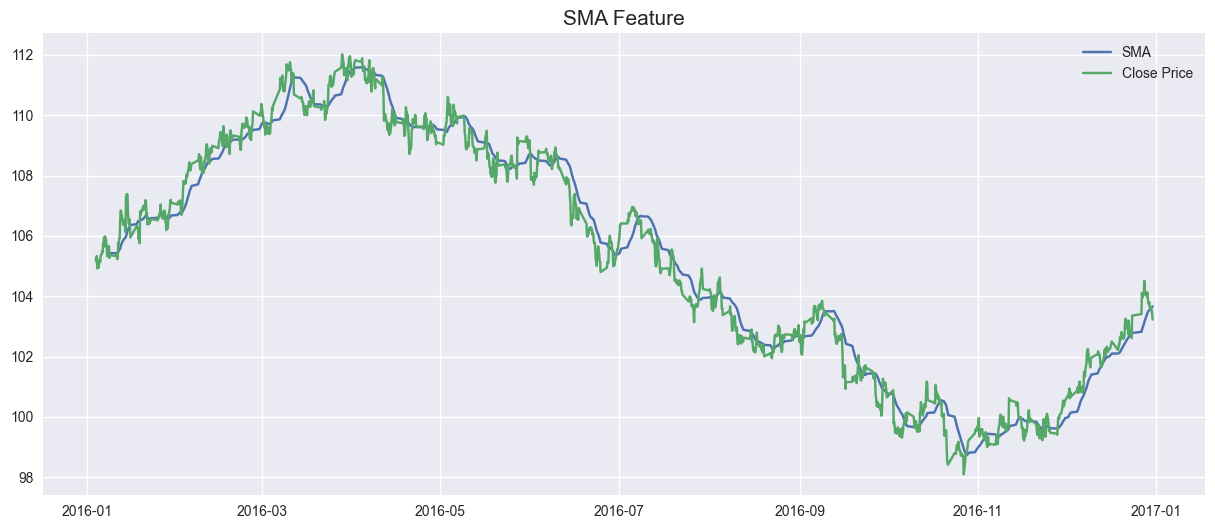

In [9]:
plt.figure(figsize=(15,6))
plt.plot(df["sma"], label="SMA")
plt.plot(df["close"], label="Close Price")
plt.title("SMA Feature", size=15)
plt.legend()
plt.show()

<br>

## **Kaufman's Adaptive Moving Average (KAMA)**

The `kama` function calculates the Kaufman's Adaptive Moving Average, which adjusts dynamically to market noise by adapting its smoothing factor based on the price efficiency ratio.

- **KAMA** belongs to the family of moving averages and was developed by Perry J. Kaufman. It was first introduced in his book *"Smarter Trading: Improving Performance in Changing Markets" (1995)*.
- This indicator is designed to smooth prices when markets are ranging and to be more responsive when markets trend.

The calculation is based on:

$$
ER_t = \frac{|\text{Price}_t - \text{Price}_{t - l_1}|}{\sum_{i = t - l_1 + 1}^{t} |\text{Price}_i - \text{Price}_{i - 1}|}
$$

Then, the smoothing constant:

$$
SC_t = \left( ER_t \cdot \left( \frac{2}{l_2 + 1} - \frac{2}{l_3 + 1} \right) + \frac{2}{l_3 + 1} \right)^2
$$

Finally, the recursive calculation:

$$
KAMA_t = KAMA_{t-1} + SC_t \cdot \left( \text{Price}_t - KAMA_{t-1} \right)
$$

**Warning**: The first `(l1 - 1)` values will be `NaN` due to insufficient data for the efficiency ratio calculation.


In [11]:
df["kama"] = fe.trend.kama(df=df, col="close", l1=10, l2=2, l3=30)

df["kama"]

time
2016-01-04 00:00:00    105.232289
2016-01-04 04:00:00    105.231944
2016-01-04 08:00:00    105.232354
2016-01-04 12:00:00    105.231068
2016-01-04 16:00:00    105.230166
                          ...    
2016-12-30 04:00:00    103.759441
2016-12-30 08:00:00    103.741749
2016-12-30 12:00:00    103.713567
2016-12-30 16:00:00    103.639221
2016-12-30 20:00:00    103.533520
Name: kama, Length: 1548, dtype: float64

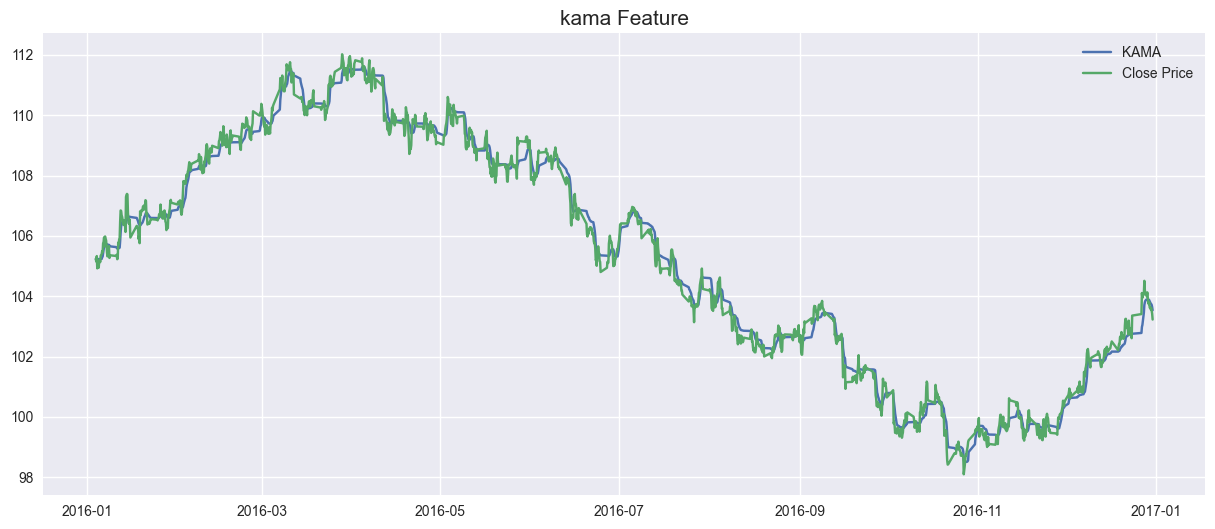

In [12]:
plt.figure(figsize=(15,6))
plt.plot(df["kama"], label="KAMA")
plt.plot(df["close"], label="Close Price")
plt.title("kama Feature", size=15)
plt.legend()
plt.show()

<br>

## Compare Moving Averages

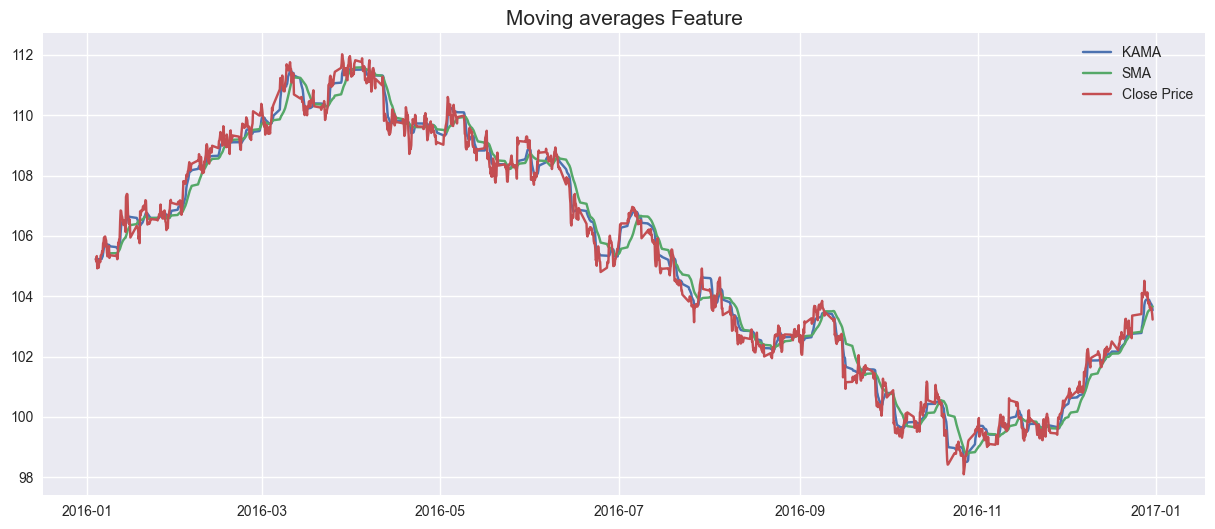

In [15]:
plt.figure(figsize=(15,6))
plt.plot(df["kama"], label="KAMA")
plt.plot(df["sma"], label="SMA")
plt.plot(df["close"], label="Close Price")
plt.title("Moving averages Feature", size=15)
plt.legend()
plt.show()